# Exploratory Data Analysis and Prediction of Udemy

## Udemy Visualizations and ML models with scikit-learn
* ### Visualizations: Seaborn and matplotlib
* ### ML models: Linear Regression and RandomForestRegressor 
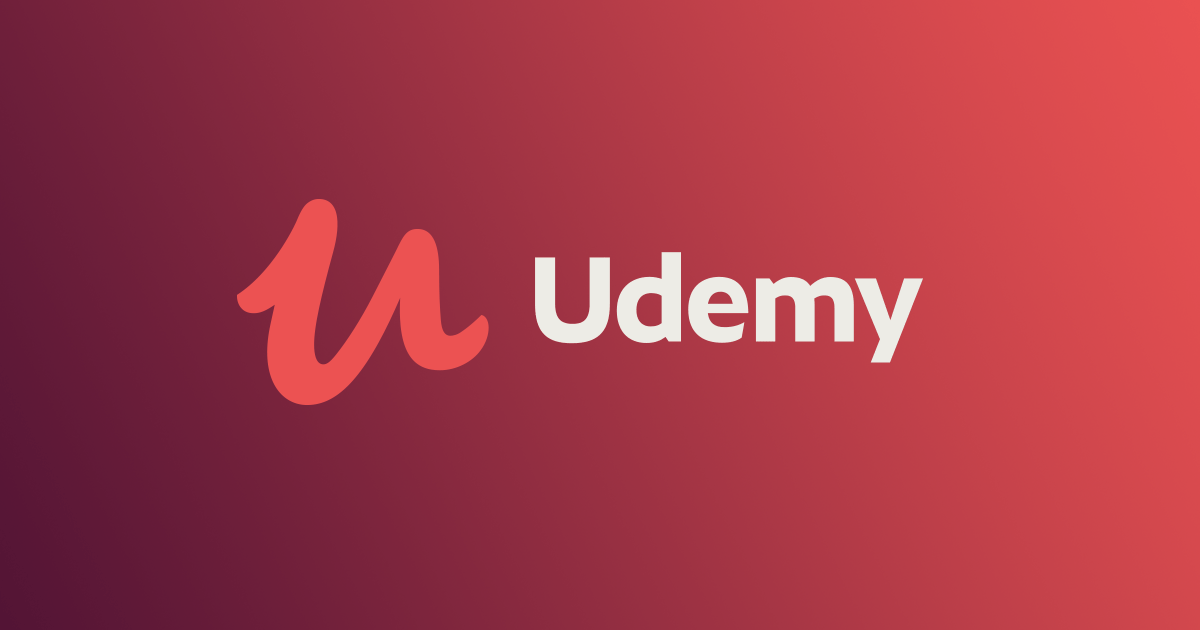

Udemy, founded in May 2010, is an American online learning platform aimed at professional adults and students. As of Jan 2020, the platform has more than 50 million students and 57,000 instructors teaching courses in over 65 languages. There have been over 295 million course enrollments. Students and instructors come from 190+ countries and 2/3 of the students are located outside of the U.S.

Students take courses largely as a means of improving job-related skills.Some courses generate credit toward technical certification. Udemy has made a special effort to attract corporate trainers seeking to create coursework for employees of their company.As of 2020, there are more than 150,000 courses on the website.



Source: https://en.wikipedia.org/wiki/Udemy

<font color = 'blue'>
Contents:
1. [Importing libraries](#1)
1. [Load and Check Data](#2)
    * [How many course we have?](#3)
    * [How many unique variable we have?](#4)
1. [Visualizations](#5)
1. [Basic Preproccessing](#8)
    * [Label Encoding](#9)
    * [one-hot encoding](#10)
1. [Modelling](#11)
    * [preparing data for train test split](#12)
    * [train test split](#13)
    * [Linear regression](#14)
    * [RandomForestRegressor](#15)

<a id = '1'> </a> </br>
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

<a id = '2'> </a> </br>
# Load and Check Data

In [2]:
udemy_data = pd.read_csv('dataset/udemy_courses.csv')
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
udemy_data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
udemy_data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


<a id = '3'> </a> </br>
# How many course we have?

In [6]:
subject_col = udemy_data['subject'].value_counts()
subject_col

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

<a id = '4'> </a> </br>
# How many unique variable we have?

In [7]:
categorical_df = udemy_data.select_dtypes(include=["object"])

In [8]:
categorical_df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
categorical_df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

<a id = '5'> </a> </br>
# Visualizations
* plots
* scatter
* heatmap

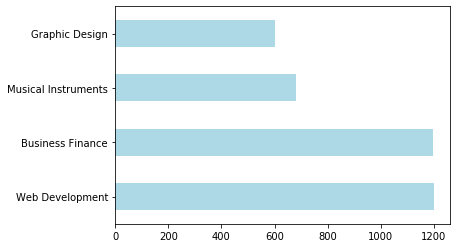

In [10]:
subject_col.plot.barh(color='lightblue');

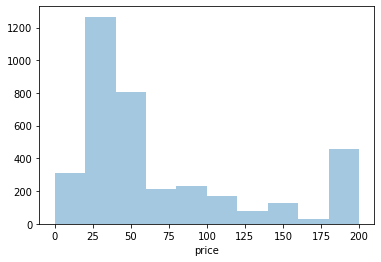

In [11]:
sns.distplot(udemy_data.price, bins=10, kde=False);

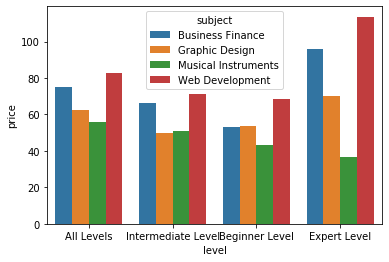

In [12]:
sns.barplot(x = "level", y = "price", hue = "subject", data = udemy_data,ci = None)
plt.show()

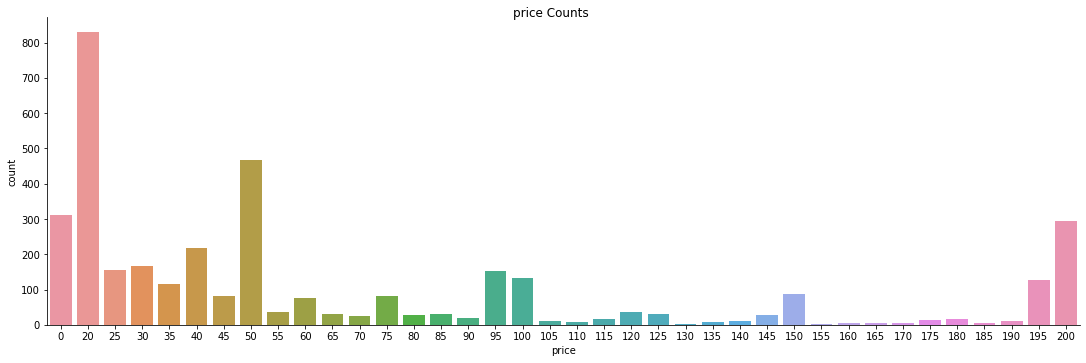

In [13]:
g = sns.catplot(x="price", aspect=3, data=udemy_data, kind="count")
g.fig.suptitle("price Counts", y=1.0)
plt.show()

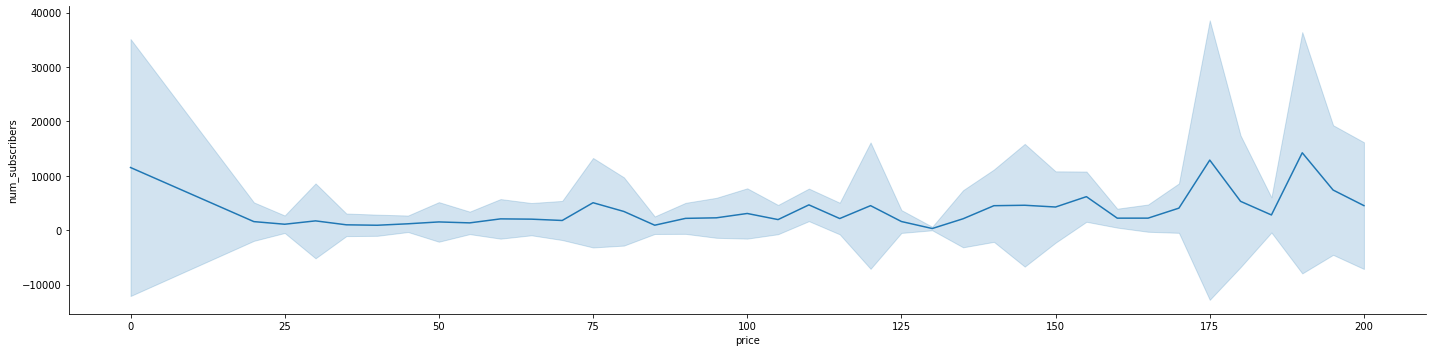

In [14]:
sns.relplot(x="price", y="num_subscribers", data=udemy_data, kind="line", aspect=4, ci="sd")
plt.show()

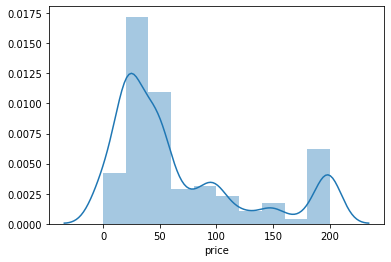

In [15]:
sns.distplot(udemy_data.price, bins=10)

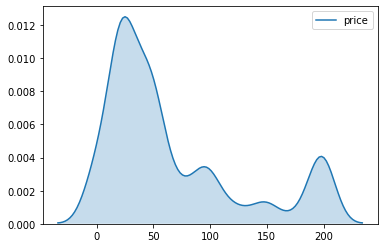

In [16]:
sns.kdeplot(udemy_data.price, shade = True)

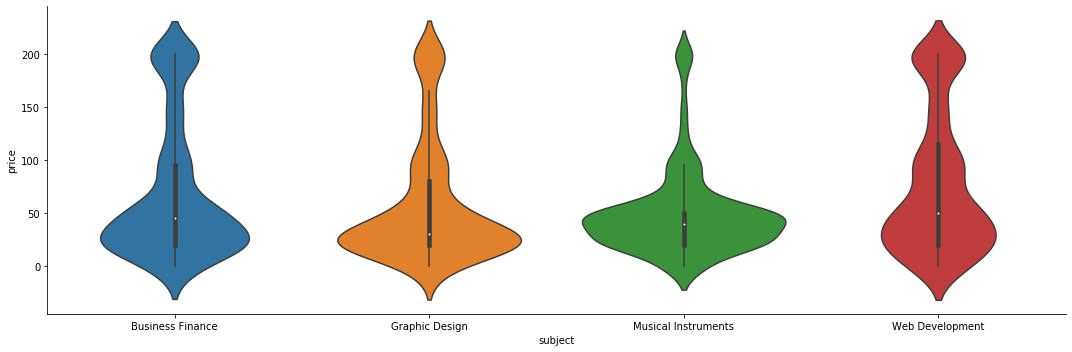

In [17]:
sns.catplot(x = "subject", y = "price", kind="violin",aspect=3, data = udemy_data,);

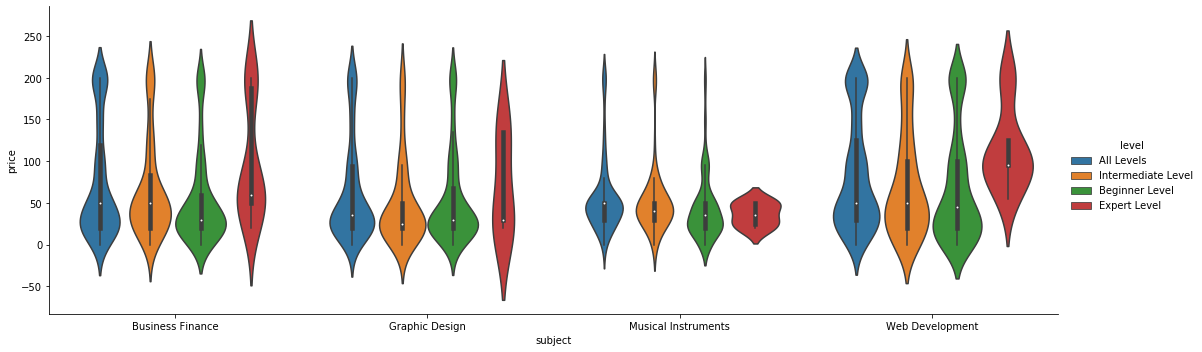

In [18]:
# 3.cu icin hue
sns.catplot(x = "subject", y = "price", hue="level", kind="violin", aspect=3, data = udemy_data);

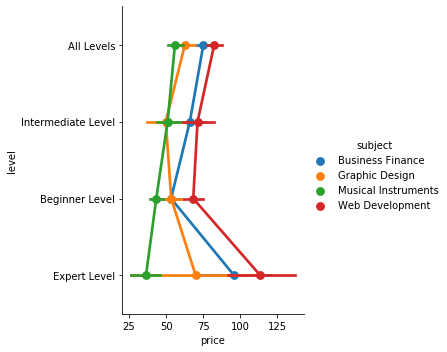

In [19]:
sns.catplot(x = "price", y = "level", hue = "subject", kind = "point", data = udemy_data);

# scatter

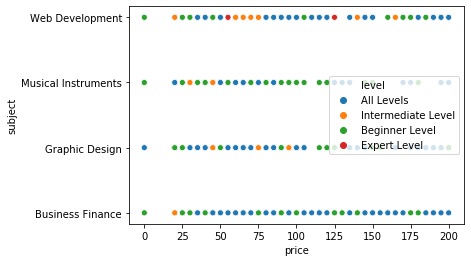

In [20]:
sns.scatterplot(x = "price", y = "subject", hue = "level", data = udemy_data);

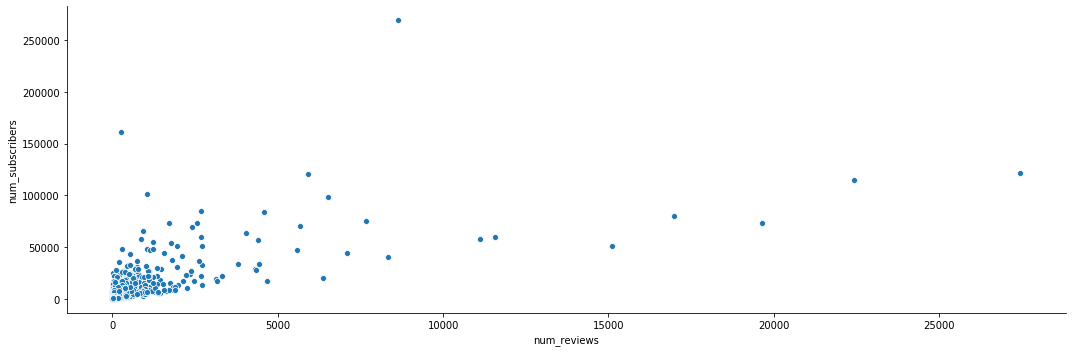

In [21]:
sns.relplot(x="num_reviews", y="num_subscribers",aspect=3, data=udemy_data, kind="scatter")
plt.show()

# heatmap

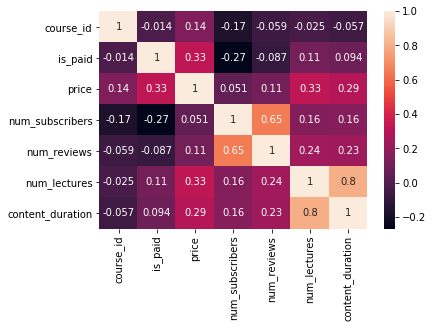

In [22]:
sns.set_palette("RdBu")
correlation=udemy_data.corr()
sns.heatmap(correlation, annot=True)
plt.show()

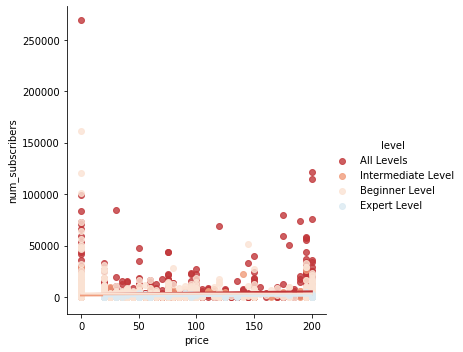

In [23]:

sns.lmplot(x = "price", y = "num_subscribers", hue = "level", data=udemy_data);

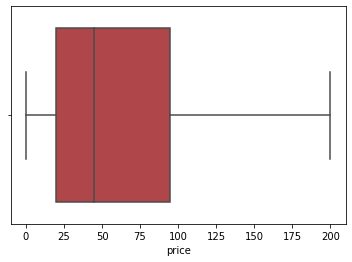

In [24]:
sns.boxplot(x = udemy_data["price"]);

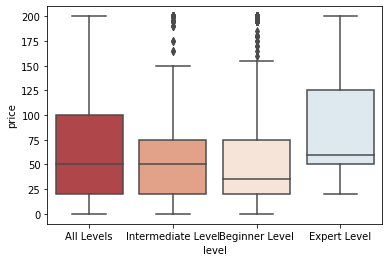

In [25]:
sns.boxplot(x = "level", y = "price", data = udemy_data);

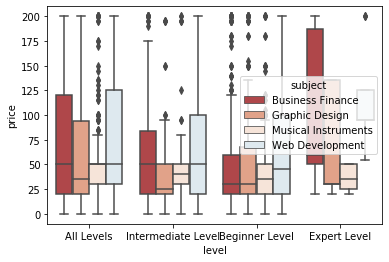

In [26]:
sns.boxplot(x = "level", y = "price", hue="subject", data = udemy_data)

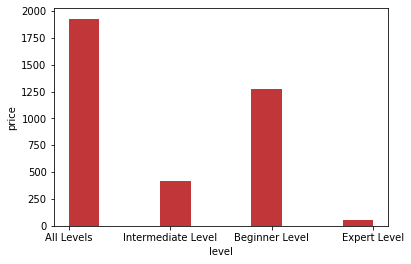

In [27]:
fig, ax = plt.subplots()
ax.hist(udemy_data.level, label="price", bins=10)
ax.set_xlabel("level")
ax.set_ylabel("price")
plt.show()

# is_paid categorical variable frequency

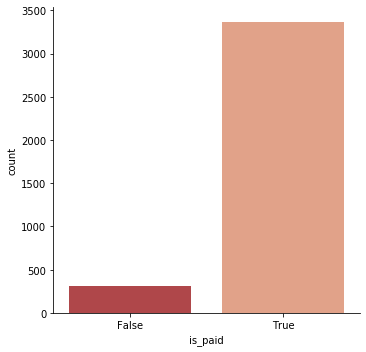

In [28]:
sns.catplot(x="is_paid",data=udemy_data, kind="count")
plt.show()

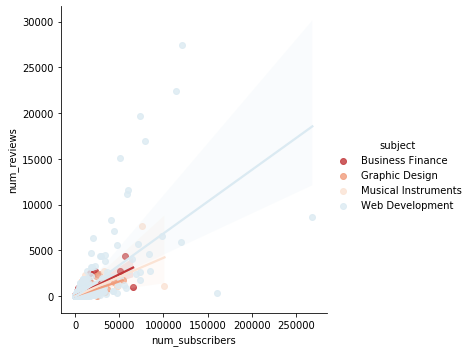

In [29]:
sns.lmplot(x = "num_subscribers",y="num_reviews", hue = "subject", data=udemy_data);

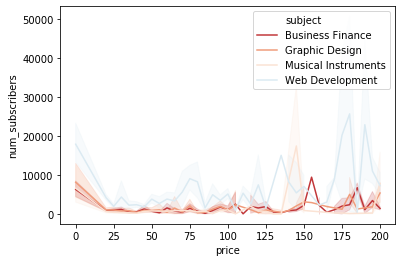

In [30]:
sns.lineplot(x = "price", y = "num_subscribers", hue="subject", data = udemy_data);

<a id = '8'> </a> </br>
# Preproccessing
* How to label encoding
* How to get one-hot encoding

In [34]:
# we dont have NaN value
df_for_model.isna().sum().sum()

0

In [35]:
df_for_model = udemy_data.copy()

<a id = '9'> </a> </br>
# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le = df_for_model.copy()
le.fit(df_le["level"])

LabelEncoder()

In [37]:
list(le.classes_)

['All Levels', 'Beginner Level', 'Expert Level', 'Intermediate Level']

<a id = '10'> </a> </br>
## one-hot encoding

In [38]:
pd.get_dummies(df_for_model["level"])

,All Levels,Beginner Level,Expert Level,Intermediate Level
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
3673,1,0,0,0
3674,0,1,0,0
3675,1,0,0,0
3676,1,0,0,0


<a id = '11'> </a> </br>
# Modelling 
* ## Reviews prediction by subscribers
* preparing data for train test split
* train test split
* Linear regression
* RandomForestRegressor

<a id = '12'> </a> </br>
### Preparing data for train test split

In [39]:
X = df_for_model['num_subscribers'].values
y = df_for_model['num_reviews'].values

In [40]:
print(X.shape)
print(y.shape)

(3678,)
(3678,)


In [46]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

<a id = '13'> </a> </br>
### train_test_split

In [47]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id = '14'> </a> </br>
### LinearRegression

In [48]:
# !!! DO NOT FORGET TO LIBRARIES
reg = LinearRegression()

reg.fit(X_train,y_train)
preds = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)
print('Score',reg.score(X_test,y_test))

637.7828616664667
Score 0.348091246495953


* <a id = '15'> </a> </br>
### RandomForestRegressor

In [49]:
# !!! DO NOT FORGET TO LIBRARIES


# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Score
print("Score :",rf.score(X_test, y_test))

C:\Users\suubc\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error: 254.8 degrees.
Score : 0.3302731631082212
